In [25]:
import pandas as pd
import warnings as wr
wr.filterwarnings('ignore')

# Data collection
dt = pd.read_csv('/content/delivery_time.csv')
dt

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [26]:
dt.shape # checking the dataframe shape


(21, 2)

In [27]:
dt.dtypes # data types

Delivery Time    float64
Sorting Time       int64
dtype: object

In [28]:
dt.isnull().sum()  # Cheacking for the missing values


Delivery Time    0
Sorting Time     0
dtype: int64

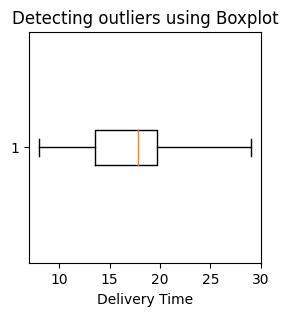

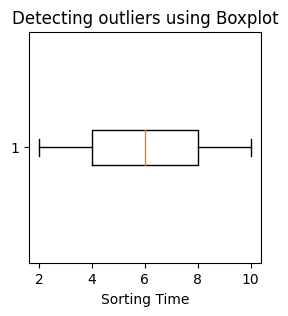

In [29]:
# Identification for any outliers

import matplotlib.pyplot as plt

for i in dict(dt.dtypes):
 if dict(dt.dtypes)[i] == 'int64' or dict(dt.dtypes)[i] ==  'float64':
  plt.figure(figsize =(3,3))
  plt.boxplot(dt[i], vert=False)
  plt.title("Detecting outliers using Boxplot")
  plt.xlabel(i)
  plt.show()


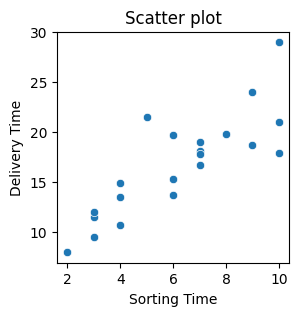

In [30]:
#  Visualization of Data

import seaborn as sns

plt.figure(figsize =(3,3))
sns.scatterplot(x = dt['Sorting Time'], y= dt['Delivery Time'], data = dt)
plt.title('Scatter plot')
plt.show()

In [31]:
dt.describe()


,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [32]:
# lets assign a variables to the columns

x = dt[['Sorting Time']]
y = dt[['Delivery Time']]

from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x,y , test_size= 0.25)

In [33]:

x_train.shape


(15, 1)

In [34]:
x_test.shape # 20% of the sorting time column from the main dataframe

(6, 1)

In [35]:
from sklearn.linear_model import LinearRegression  # importing the linear regression model
reg= LinearRegression()   # Assigning the model to a variable reg
reg.fit(x_train,y_train) # training the model

LinearRegression()

In [36]:

# Now our model is ready to test

reg.predict([[4]]) # gave a random sorting time 4

array([[13.22844828]])

In [37]:

# Checking for the test variables

y_pred =reg.predict(x_test)
y_pred

array([[17.79724138],
       [20.84310345],
       [16.27431034],
       [11.70551724],
       [22.36603448],
       [22.36603448]])

Text(0.5, 1.0, 'Sorting Time - Delivery Time Data')

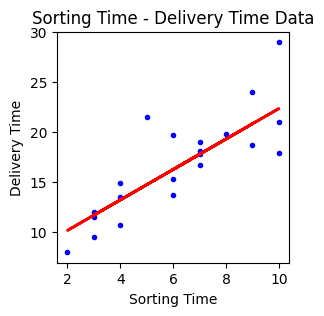

In [38]:
# Lets see the best fit line

plt.figure(figsize =(3,3))
plt.scatter(dt[['Sorting Time']], dt[['Delivery Time']], color = 'blue', marker = '.')
plt.plot(x_train, reg.predict(x_train), color = 'red',linewidth= 2)
plt.ylabel('Delivery Time')
plt.xlabel('Sorting Time')
plt.title('Sorting Time - Delivery Time Data')

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_train,reg.predict(x_train))
print('Mean squared error',mse.round(3))

import numpy as np
print("Root mean squared error",np.sqrt(mse).round(3))


Mean squared error 6.127
Root mean squared error 2.475


In [40]:
# Feature transformation

from sklearn.preprocessing import FunctionTransformer
transform = FunctionTransformer(func=np.log1p)                 # Log transform
transformed_log = transform.fit_transform(x_train)

mse = mean_squared_error(y_train,reg.predict(transformed_log))
print('Mean squared error',mse.round(3))

import numpy as np
print("Root mean squared error",np.sqrt(mse).round(3))


Mean squared error 48.456
Root mean squared error 6.961


In [41]:
tranformed_square = np.square(x_train)                         # Square transform
mse = mean_squared_error(y_train,reg.predict(tranformed_square))
print('Mean squared error',mse.round(3))

import numpy as np
print("Root mean squared error",np.sqrt(mse).round(3))

Mean squared error 3800.325
Root mean squared error 61.647


In [42]:
tranformed_sqrt = np.sqrt(x_train)                            # Square root Tranform
mse = mean_squared_error(y_train,reg.predict(tranformed_sqrt))
print('Mean squared error',mse.round(3))

import numpy as np
print("Root mean squared error",np.sqrt(mse).round(3))

Mean squared error 39.146
Root mean squared error 6.257
